<a href="https://colab.research.google.com/github/ronee12/Computer-Vision-Deep-learning-Work-Shop/blob/master/IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb 

In [0]:
(x_train_data,y_train_data),(x_test_data,y_test_data) = imdb.load_data(num_words=10000)

In [56]:
type(x_train_data)

numpy.ndarray

In [57]:
x_train_data.shape

(25000,)

In [0]:
import numpy as np

def vectorize(sequences, dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i,sq in enumerate(sequences):
    results[i,sq] = 1
  return results

In [0]:
X_train = vectorize(x_train_data)

In [60]:
X_train.shape

(25000, 10000)

In [0]:
X_test = vectorize(x_test_data)

In [62]:
X_test.shape

(25000, 10000)

In [63]:
type(X_train)

numpy.ndarray

In [0]:
y_train = np.asarray(y_train_data).astype('float32')
y_test = np.asarray(y_test_data,dtype='float32')

In [0]:
X_val = X_train[:10000]
X_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]


In [66]:
print("Train set shape {}".format(X_train.shape))
print("Valid set shape {}".format(X_val.shape))
print("Test set shape {}".format(X_test.shape))

Train set shape (15000, 10000)
Valid set shape (10000, 10000)
Test set shape (25000, 10000)


In [0]:
from keras.layers import Dense
from keras.models import Sequential

In [68]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(X_train,y_train,batch_size=512,epochs=20,validation_data=(X_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.5002 - accuracy: 0.7897 - val_loss: 0.3721 - val_accuracy: 0.8720
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2970 - accuracy: 0.9041 - val_loss: 0.2988 - val_accuracy: 0.8905
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2134 - accuracy: 0.9323 - val_loss: 0.2896 - val_accuracy: 0.8845
Epoch 4/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1691 - accuracy: 0.9455 - val_loss: 0.2770 - val_accuracy: 0.8899
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1372 - accuracy: 0.9571 - val_loss: 0.2920 - val_accuracy: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1139 - accuracy: 0.9640 - val_loss: 0.3103 - val_accuracy: 0.8828
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

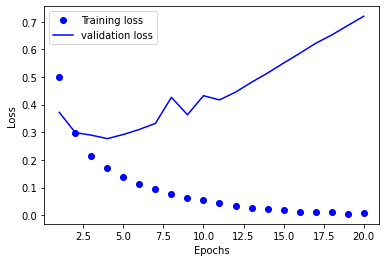

In [74]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


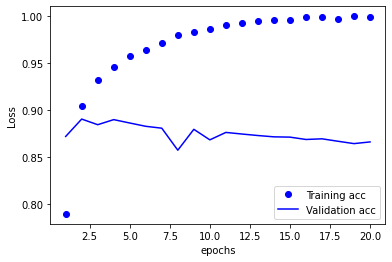

In [76]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
15000/15000 [==============================] - 1s 62us/step - loss: 0.5025 - accuracy: 0.7979
Epoch 2/4
15000/15000 [==============================] - 1s 58us/step - loss: 0.2990 - accuracy: 0.9035
Epoch 3/4
15000/15000 [==============================] - 1s 58us/step - loss: 0.2201 - accuracy: 0.9270
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [80]:
results

[0.29943205522060395, 0.8780800104141235]

In [81]:
model.predict(X_test)

array([[0.33149627],
       [0.9986401 ],
       [0.9776654 ],
       ...,
       [0.09716529],
       [0.19636576],
       [0.56433773]], dtype=float32)